In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from game import game
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

In [2]:
def run_sim(trials = 10000, run_seed = 12345678):
    cycles = []
    for i in range(trials):
        cycles.append(game())

    results = pd.DataFrame(cycles, columns=["cycles", "winner"])
    results.to_csv("t"+str(trials)+"_s"+str(run_seed)+"results.csv", index=False)
    results.head(5)
    results_grouped = results.groupby("cycles", as_index=False).count()
    results_grouped.columns = ["cycles", "count"]
    results_grouped.head(5)
    fig, axes = plt.subplots(figsize=(10, 5))
    axes.bar(results_grouped["cycles"], height=results_grouped["count"])
    plt.show()
    expected_cycles = results["cycles"].mean()
    print("Expected number of cycles for " + str(trials)+" trials : ", expected_cycles)   
    f = Fitter(results["cycles"].values,
           distributions= get_common_distributions())
    f.fit()
    f.summary()

    from distfit import distfit
    dist = distfit()
    dist.fit_transform(results["cycles"].values, verbose=0)
    print(dist.summary)
    dist.plot()
    plt.show()
    dist.plot_summary()
    plt.show() 

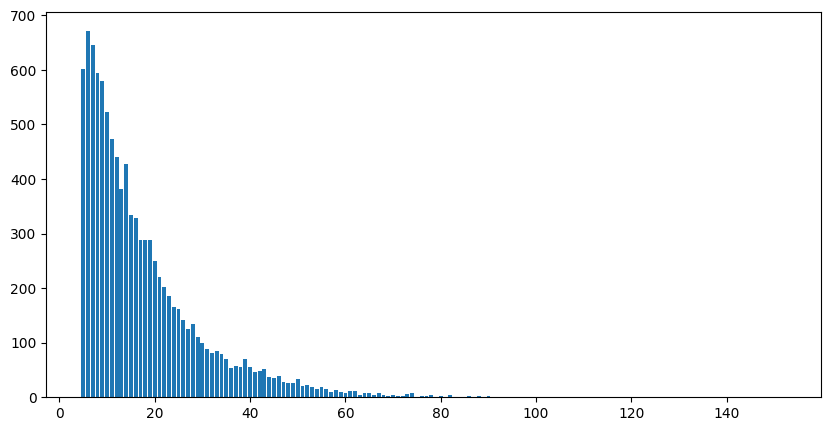

Expected number of cycles for 10000 trials :  17.5654


Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.06it/s]


          name     score          loc       scale  \
0       pareto  0.003642  -512.082014  517.082014   
1        expon  0.003671          5.0     12.5654   
2      lognorm  0.005233     3.687086    9.241613   
3   genextreme   0.00628    10.647508    5.979572   
4         beta  0.006506     4.064952  149.937617   
5            t  0.010833    13.922675    7.472283   
6     dweibull  0.011595    14.385253     9.11445   
7         norm  0.014052      17.5654   12.858613   
8     loggamma  0.014321 -4395.313617  586.725687   
9      uniform  0.029831          5.0       147.0   
10       gamma  0.062387          5.0    3.378413   

                                        arg  \
0                     (42.150632039478815,)   
1                                        ()   
2                     (0.9511361954160534,)   
3                    (-0.4635190430727046,)   
4   (1.4256925921614083, 14.05739580904207)   
5                     (2.5528474912444326,)   
6                     (1.056051204

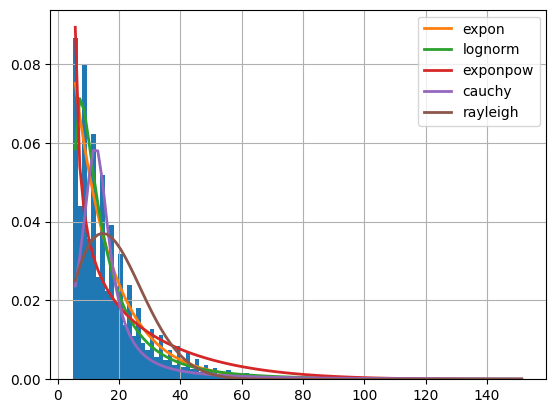

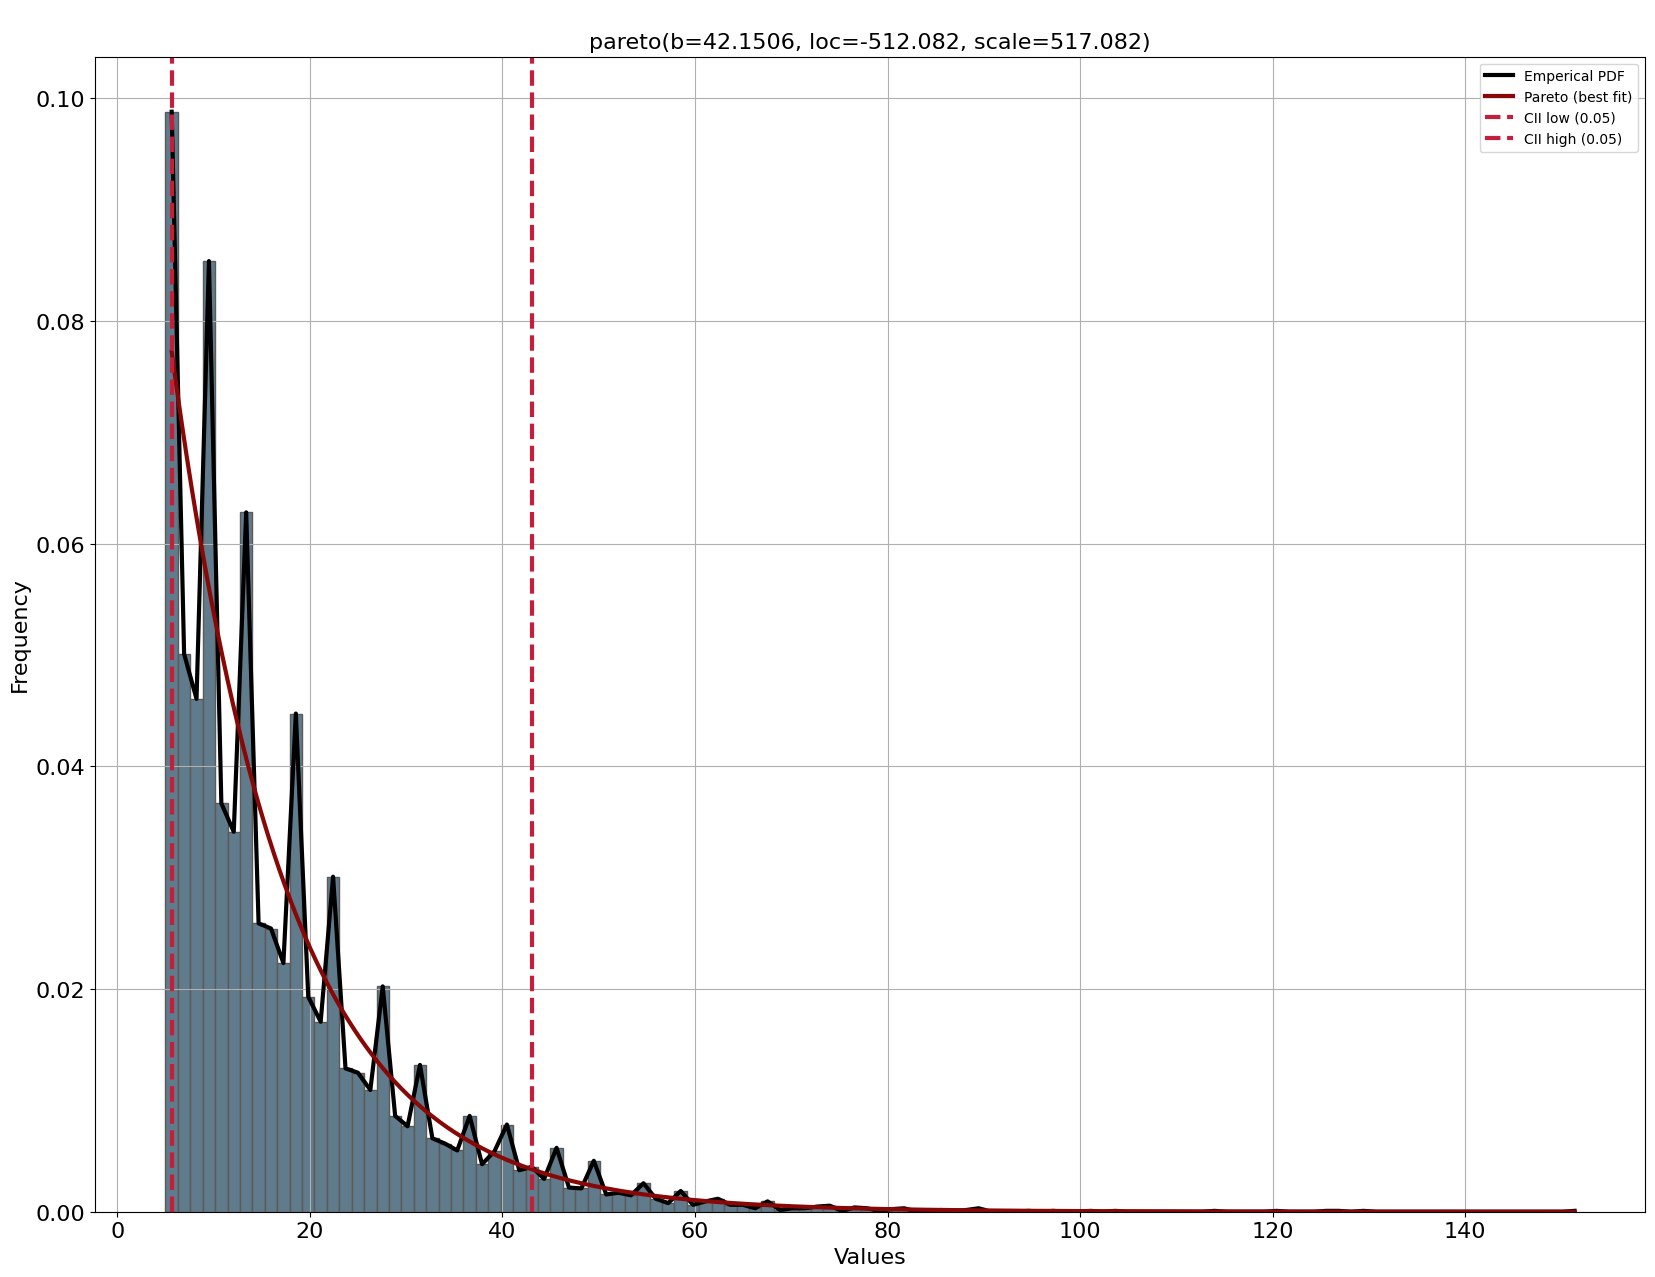

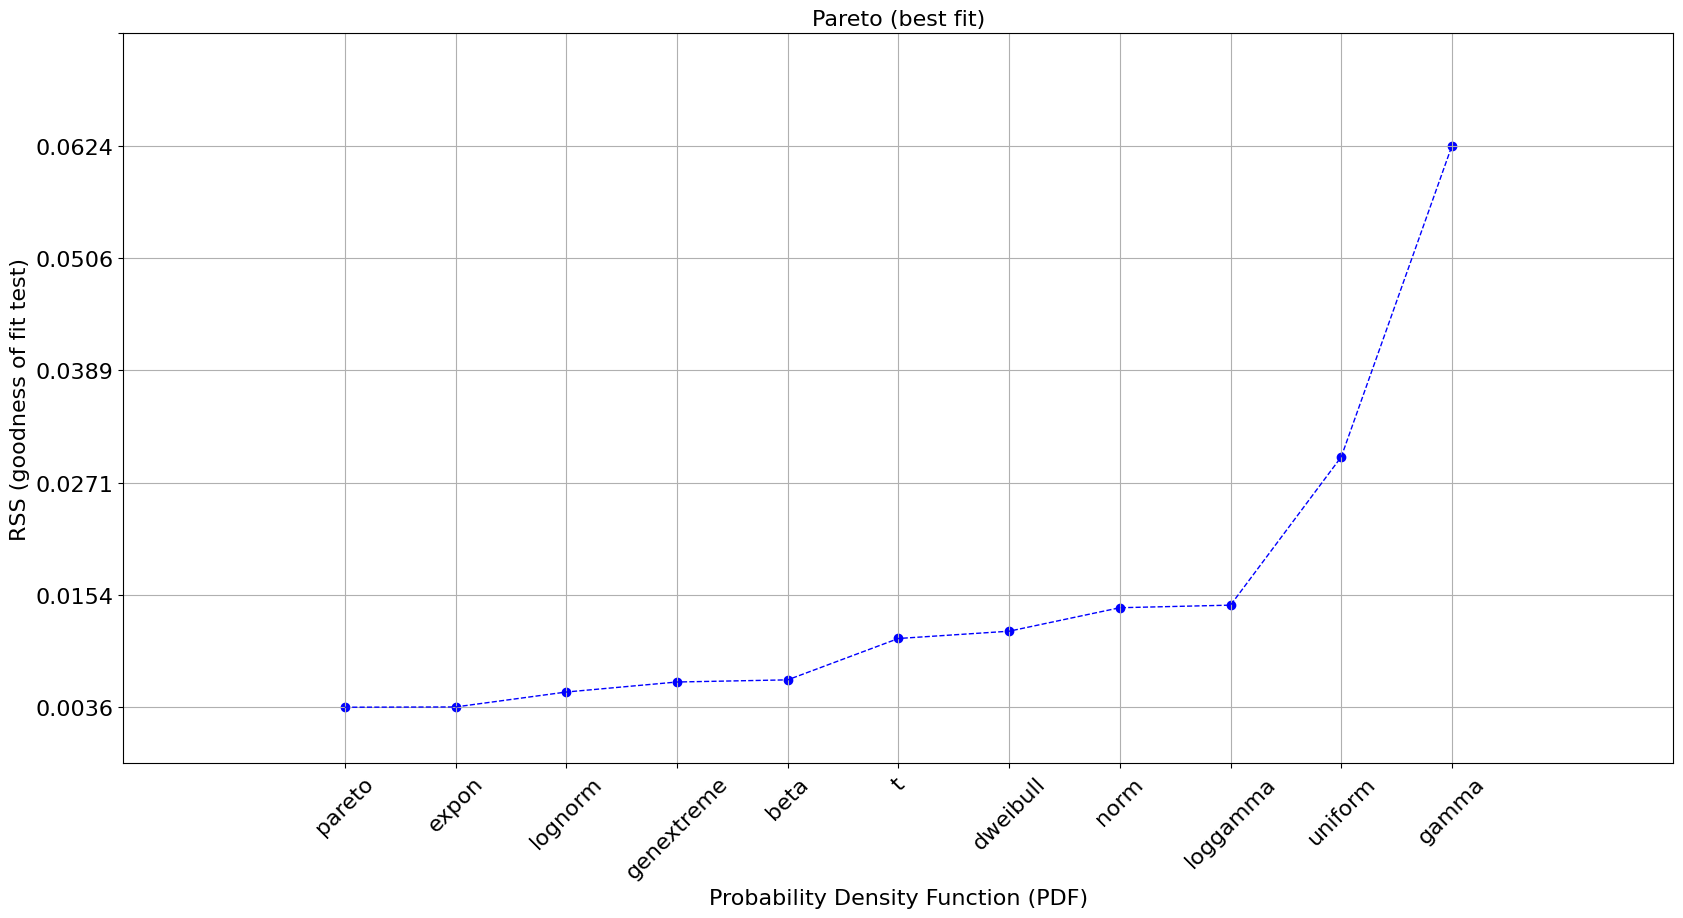

In [3]:
run_sim( trials=10000, run_seed=12345678)

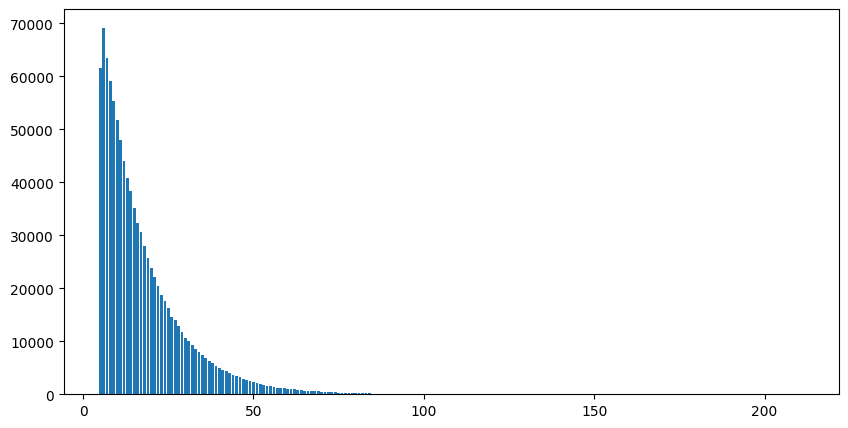

Expected number of cycles for 1000000 trials :  17.544829


Fitting 10 distributions:  80%|████████  | 8/10 [00:24<00:09,  4.71s/it]SKIPPED exponpow distribution (taking more than 30 seconds)
SKIPPED lognorm distribution (taking more than 30 seconds)
Fitting 10 distributions: 100%|██████████| 10/10 [00:30<00:00,  3.00s/it]


          name     score          loc       scale  \
0       pareto  0.286062  -637.644555  642.644555   
1        expon  0.286159          5.0   12.544829   
2         beta  0.289025          5.0  693.618606   
3      lognorm  0.295066     3.681709    9.227609   
4   genextreme  0.299142    10.641127    5.995799   
5            t  0.317345    14.013703    7.591929   
6        gamma  0.317361          5.0   11.806266   
7     dweibull  0.319496    14.419033    9.149052   
8         norm  0.329877    17.544829   12.769916   
9     loggamma  0.330729 -3880.987935  528.433202   
10     uniform  0.404488          5.0       206.0   

                                        arg  \
0                      (52.22699930573758,)   
1                                        ()   
2   (0.6073969421742068, 31.23694088925639)   
3                     (0.9533511811332067,)   
4                    (-0.4616910617581172,)   
5                      (2.648155930137781,)   
6                     (0.670989735

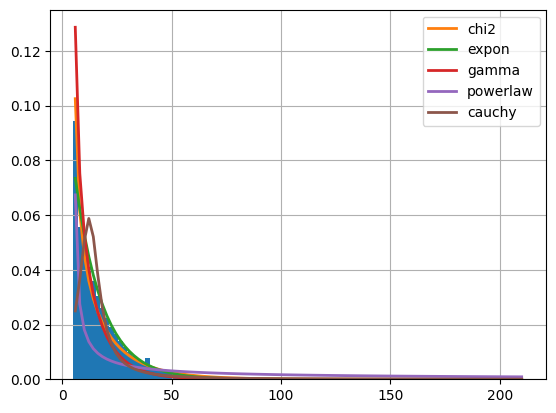

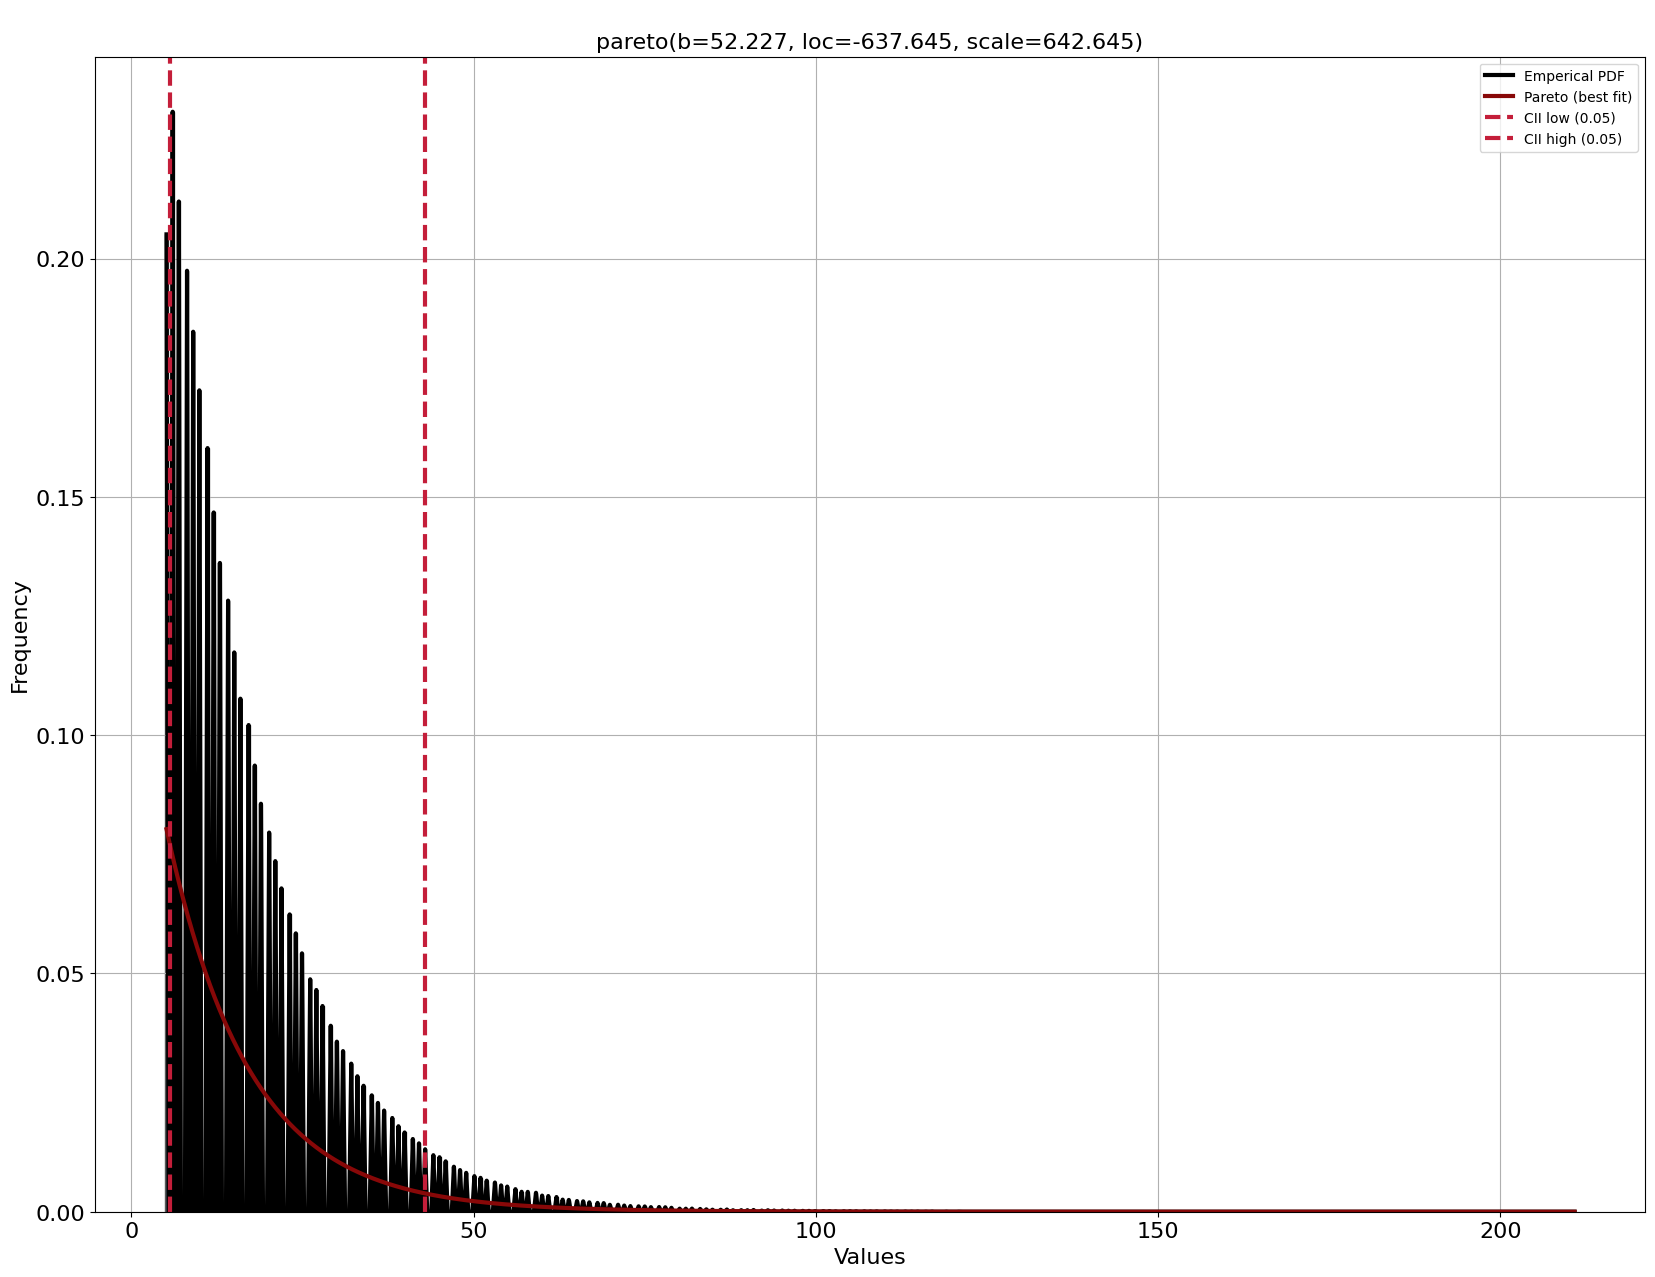

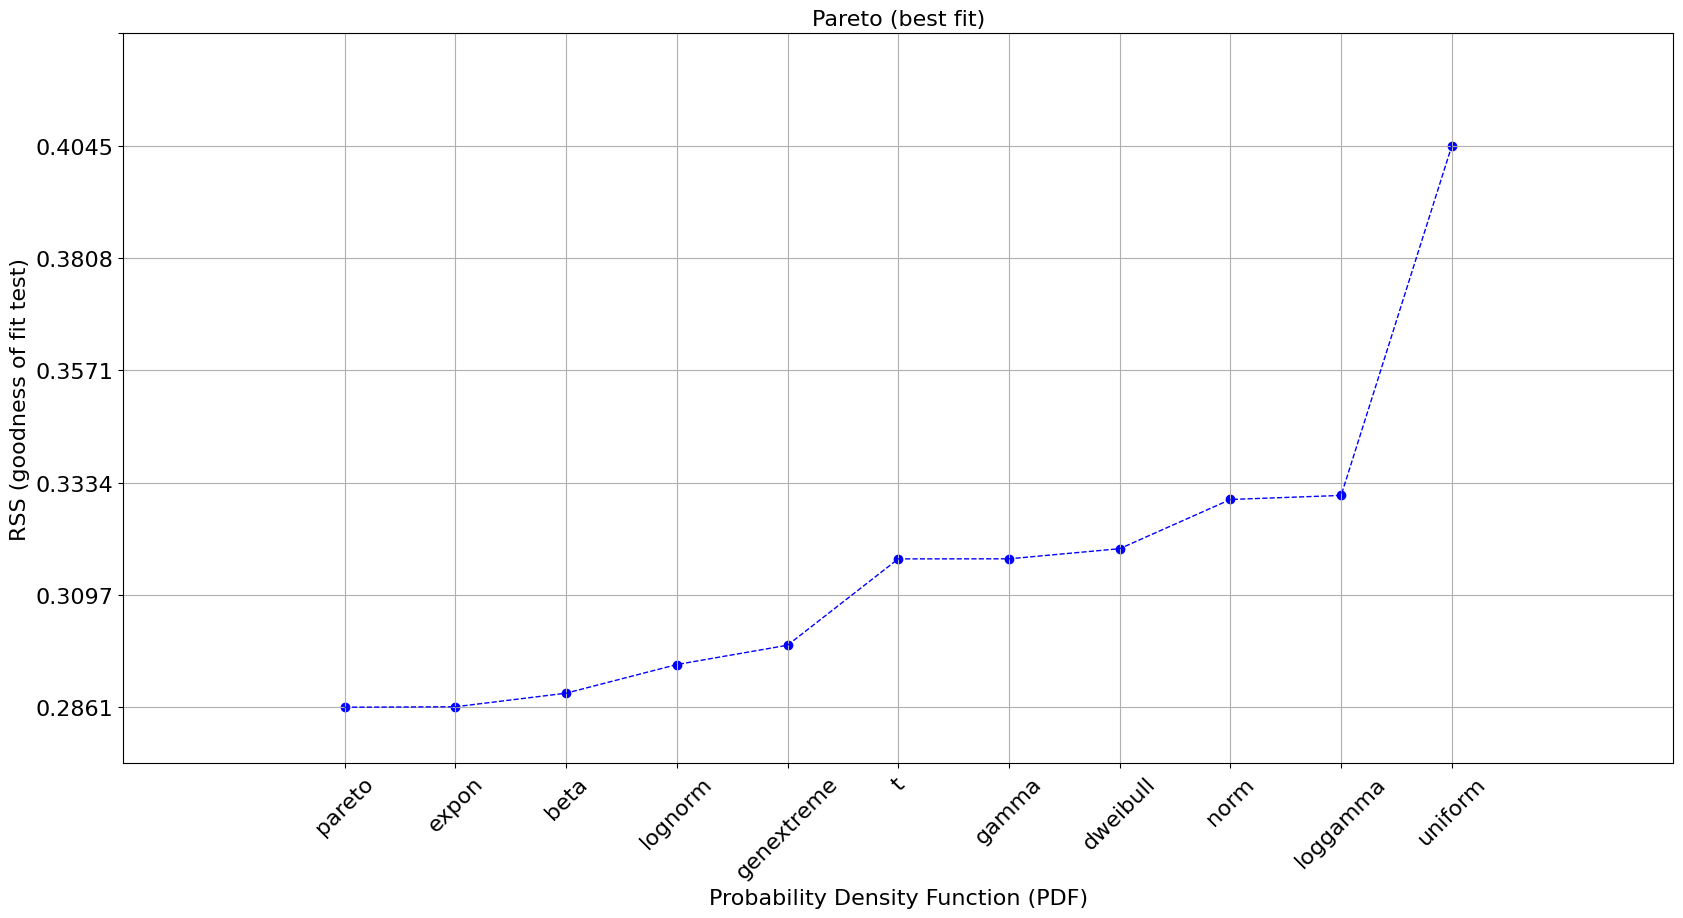

In [5]:
run_sim( trials=1000000, run_seed=12345678)

In [ ]:
run_sim( trials=10000000, run_seed=12345678)

In [2]:
# Run the game 10000 times and store the results
cycles = []
for i in range(1000000):
    cycles.append(game())

results = pd.DataFrame(cycles, columns=["cycles", "winner"])
results.to_csv("results.csv", index=False)
results.head(5)

,cycles,winner
0,8,B
1,22,A
2,11,A
3,6,A
4,17,A


In [3]:
# aggregate counts of cycles
results_grouped = results.groupby("cycles", as_index=False).count()
results_grouped.columns = ["cycles", "count"]
results_grouped.head(5)

,cycles,count
0,5,61371
1,6,68771
2,7,63393
3,8,59300
4,9,56114


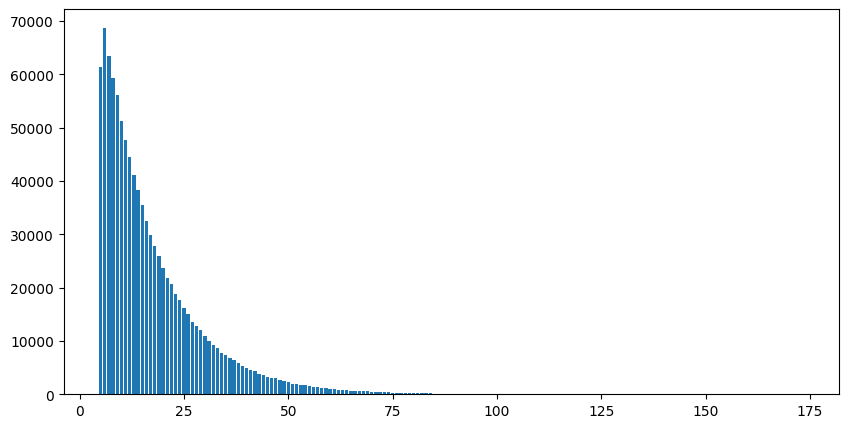

In [4]:

# Plot the number of cycles in the results as a histogram. Make the histogram wider by setting the figsize parameter.
fig, axes = plt.subplots(figsize=(10, 5))
axes.bar(results_grouped["cycles"], height=results_grouped["count"])
plt.show()

In [5]:
# compute the expected number of cycles
expected_cycles = results["cycles"].mean()
print("Expected number of cycles: ", expected_cycles)

Expected number of cycles:  17.550382


In [6]:
# f = Fitter(results_grouped)
# f.fit()
# f.summary()

In [7]:
# f = Fitter(results_grouped,
#            distributions= get_common_distributions())
# f.fit()
# f.summary()

In [8]:
# f.get_best(method = 'sumsquare_error')

In [9]:
# f.get_best(method = 'bic')

Fitting 10 distributions: 100%|██████████| 10/10 [00:30<00:00,  3.00s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,0.001109,1848.554894,-2.062004e+07,inf,0.061371,0.0
gamma,0.003559,1820.001787,-1.945386e+07,inf,0.172167,0.0
cauchy,0.006756,1508.965539,-1.881276e+07,inf,0.202348,0.0
rayleigh,0.007211,4235.447218,-1.874757e+07,inf,0.162761,0.0
powerlaw,0.007877,1200.988241,-1.865922e+07,inf,0.315207,0.0


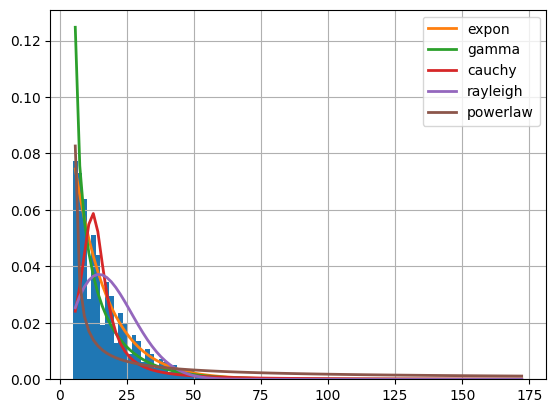

In [10]:
f = Fitter(results["cycles"].values,
           distributions= get_common_distributions())
f.fit()
f.summary()

In [11]:
from distfit import distfit
dist = distfit()
dist.fit_transform(results["cycles"].values)
print(dist.summary)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.329246] [loc=17.550 scale=12.777]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.285696] [loc=5.000 scale=12.550]
[distfit] >INFO> [pareto    ] [0.42 sec] [RSS: 0.285603] [loc=-638.989 scale=643.989]
[distfit] >INFO> [dweibull  ] [3.97 sec] [RSS: 0.318941] [loc=14.414 scale=9.145]
[distfit] >INFO> [t         ] [52.4 sec] [RSS: 0.330698] [loc=17.700 scale=11.400]
[distfit] >INFO> [genextreme] [31.8 sec] [RSS: 0.298564] [loc=10.649 scale=5.998]
[distfit] >INFO> [gamma     ] [11.9 sec] [RSS: 0.301194] [loc=5.000 scale=15.232]
[distfit] >INFO> [lognorm   ] [21.3 sec] [RSS: 0.294543] [loc=3.677 scale=9.243]
[distfit] >INFO> [beta      ] [23.2 sec] [RSS: 0.284286] [loc=5.000 scale=890.017]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.400133] [loc=5.000 scale=168.000]
[distfit] >INFO> [loggamma  ] [10.7 sec] [RSS: 0.330017] [loc=-4950.327 scale=640.631]
[distfit] >INFO> Compute confidence in

          name     score          loc       scale  \
0         beta  0.284286          5.0  890.016796   
1       pareto  0.285603  -638.988544  643.988544   
2        expon  0.285696          5.0   12.550382   
3      lognorm  0.294543     3.676814    9.242673   
4   genextreme  0.298564    10.648688    5.998287   
5        gamma  0.301194          5.0   15.232083   
6     dweibull  0.318941     14.41364    9.144856   
7         norm  0.329246    17.550382   12.776583   
8     loggamma  0.330017 -4950.327334  640.631241   
9            t  0.330698    17.700407   11.399794   
10     uniform  0.400133          5.0       168.0   

                                        arg  \
0   (0.8011261255905588, 63.86673763485615)   
1                      (52.31147398569891,)   
2                                        ()   
3                      (0.951978665577212,)   
4                    (-0.4609648095110181,)   
5                     (0.6446210918617683,)   
6                     (1.065431166

[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Beta(loc:5.000000, scale:890.016796)


(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nbeta(a=0.801126, b=63.8667, loc=5, scale=890.017)'}, xlabel='Values', ylabel='Frequency'>)

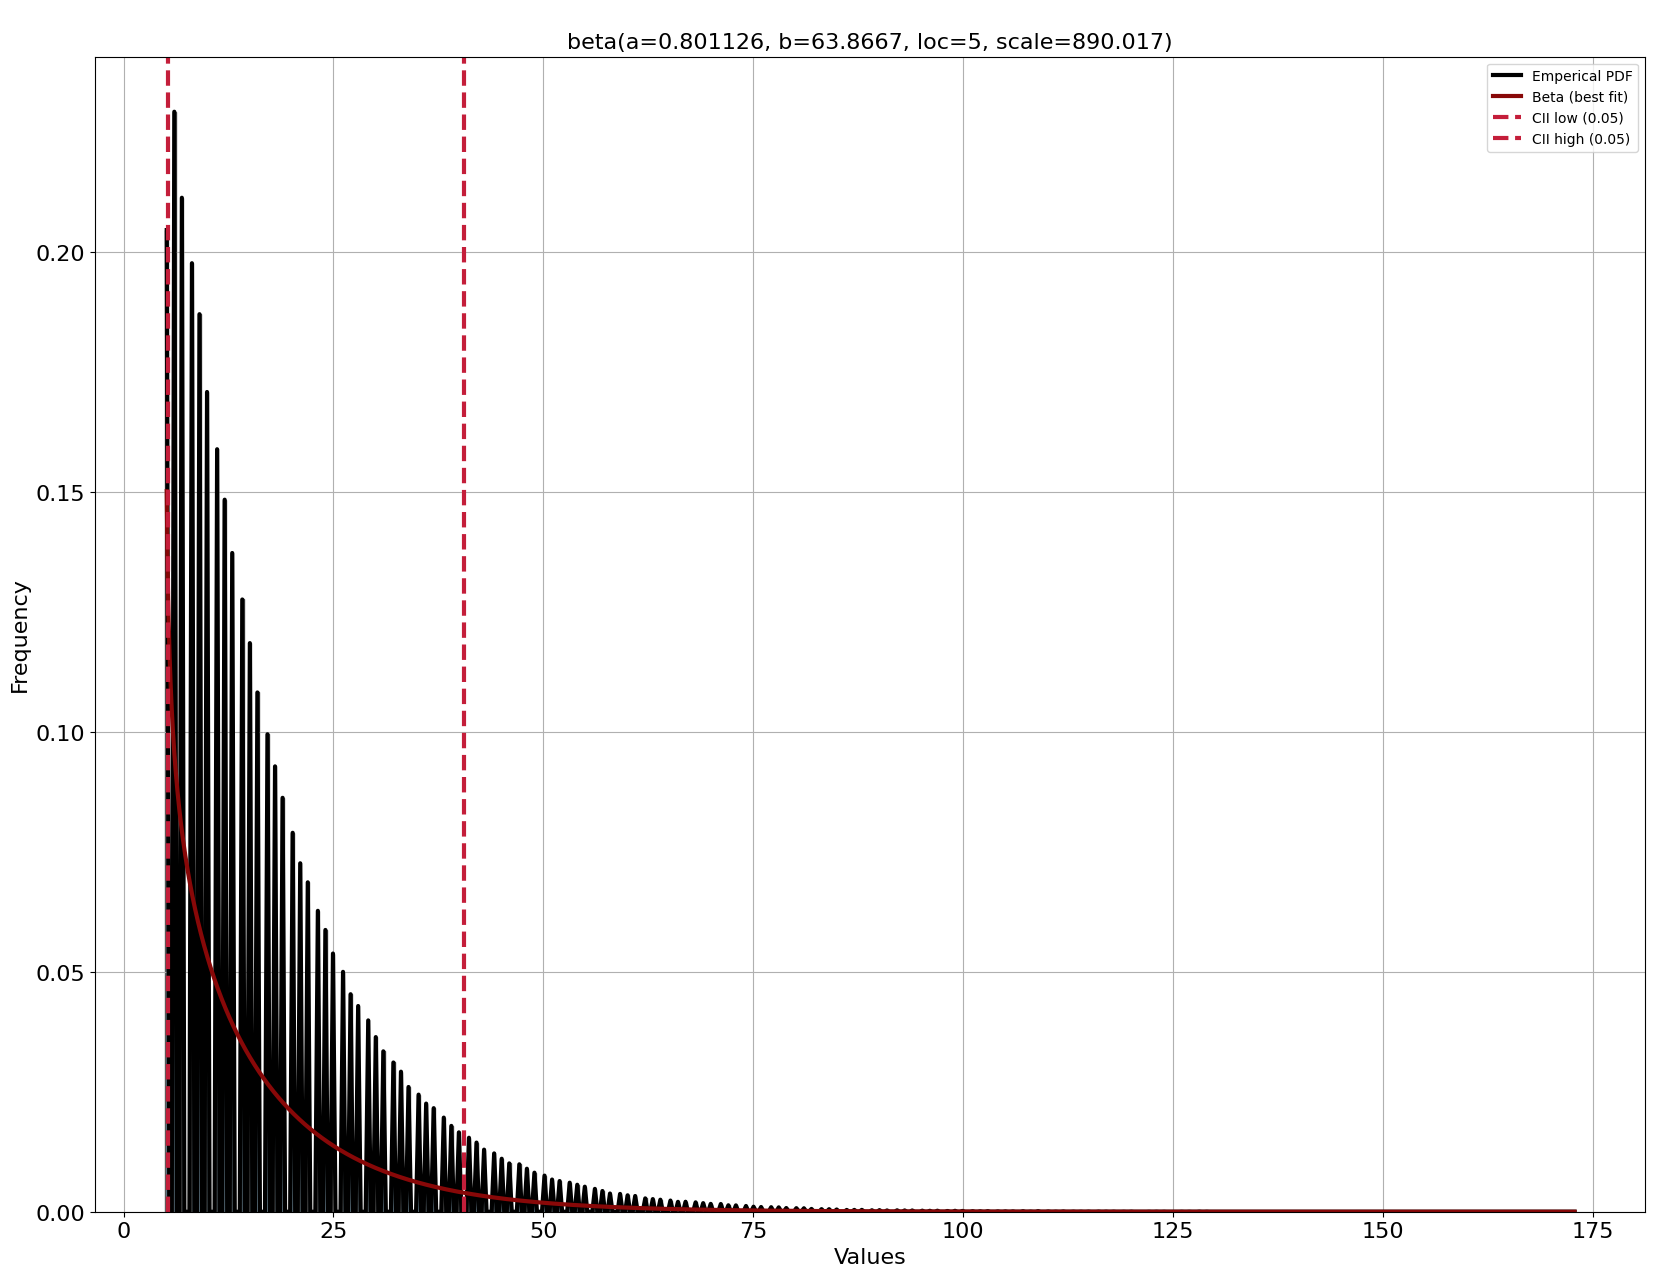

In [12]:
dist.plot()

[distfit] >INFO> Ploting Summary.


(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Beta (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

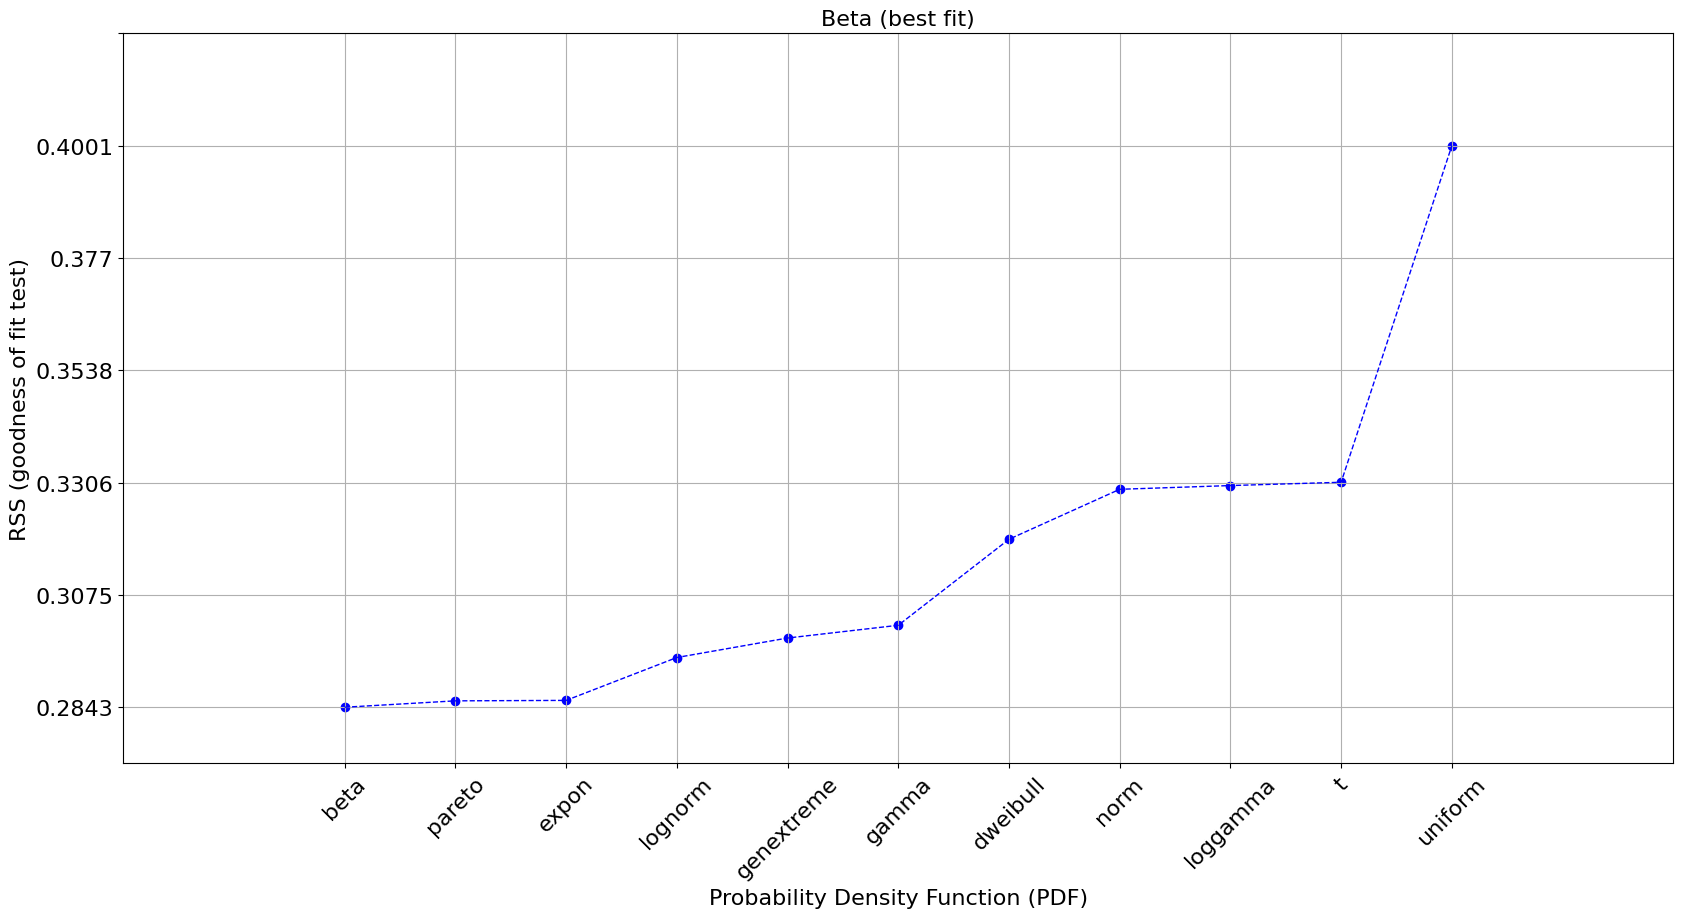

In [13]:
dist.plot_summary()